In [17]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [18]:
X,y = make_classification(n_samples=1000,n_classes=2,random_state=1)

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [20]:
dummy_model_prob = [0 for _ in range (len(y_test))] # dummy model with default output set to '0'
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [21]:
## Basic Regression Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [22]:
model_prob = model.predict_proba(X_test)
model_prob = model_prob[:,1]

In [23]:
# Let's calculate the scores 
dummy_model_accuracy = roc_auc_score(y_test,dummy_model_prob)
model_accuracy = roc_auc_score(y_test,model_prob)

print(f'The accuracy score of DUMMY MODEL is {dummy_model_accuracy}')
print(f'The accuracy of BASIC MODEL is : {model_accuracy}')

The accuracy score of DUMMY MODEL is 0.5
The accuracy of BASIC MODEL is : 0.907648


In [30]:
# Calculate roc curves

dummy_fpr ,dummy_tpr ,_ = roc_curve(y_test,dummy_model_prob)

model_fpr, model_tpr ,thresholds= roc_curve(y_test,model_prob)


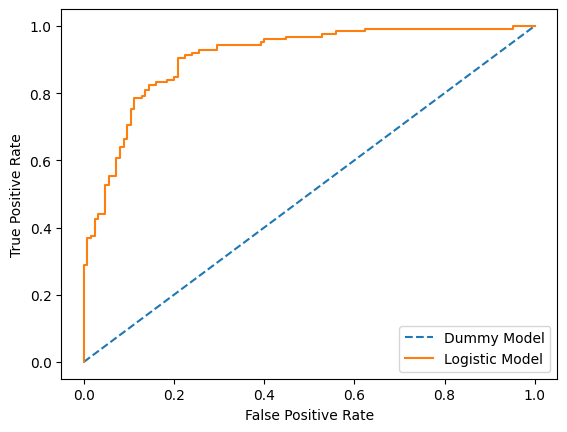

In [35]:
pyplot.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
pyplot.plot(model_fpr, model_tpr, linestyle='-', label='Logistic Model')


pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()
pyplot.show()

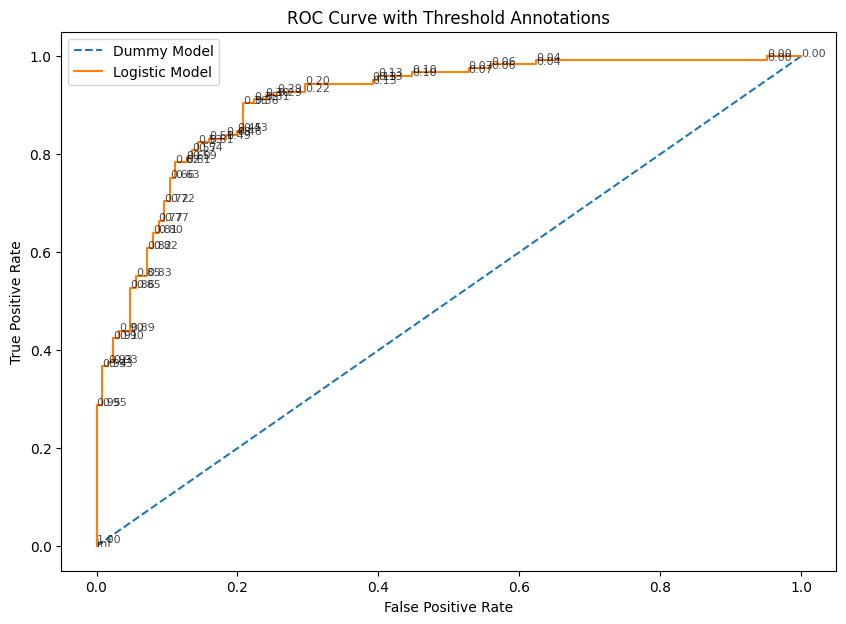

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming these are already defined:
# model_fpr, model_tpr, thresholds from roc_curve
# dummy_fpr, dummy_tpr

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)

# Plot ROC curves
ax.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
ax.plot(model_fpr, model_tpr, linestyle='-', label='Logistic Model')

# Annotate thresholds on the Logistic Model ROC curve
for fpr, tpr, threshold in zip(model_fpr, model_tpr, thresholds):
    ax.annotate(f'{threshold:.2f}', xy=(fpr, tpr), fontsize=8, alpha=0.7)

# Set labels and legend
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()
ax.set_title('ROC Curve with Threshold Annotations')

plt.show()
